Scatter plot saved to file: E:\China_vs_India\PAK\Agglomeration_Results\Agglomeration_Scatter_1996_2006.svg


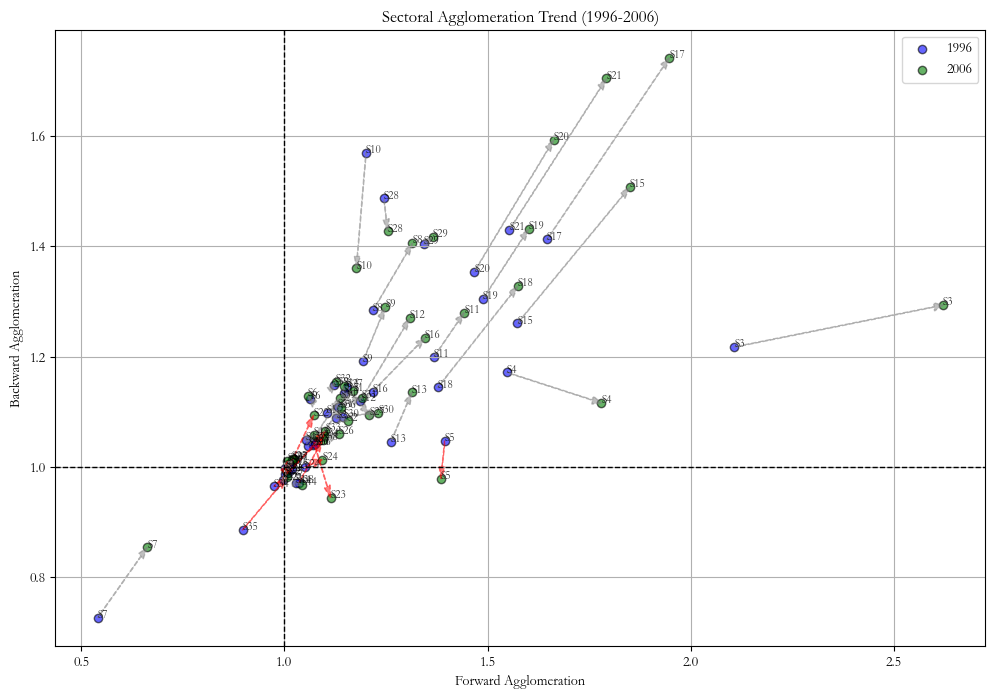

Scatter plot saved to file: E:\China_vs_India\PAK\Agglomeration_Results\Agglomeration_Scatter_2009_2019.svg


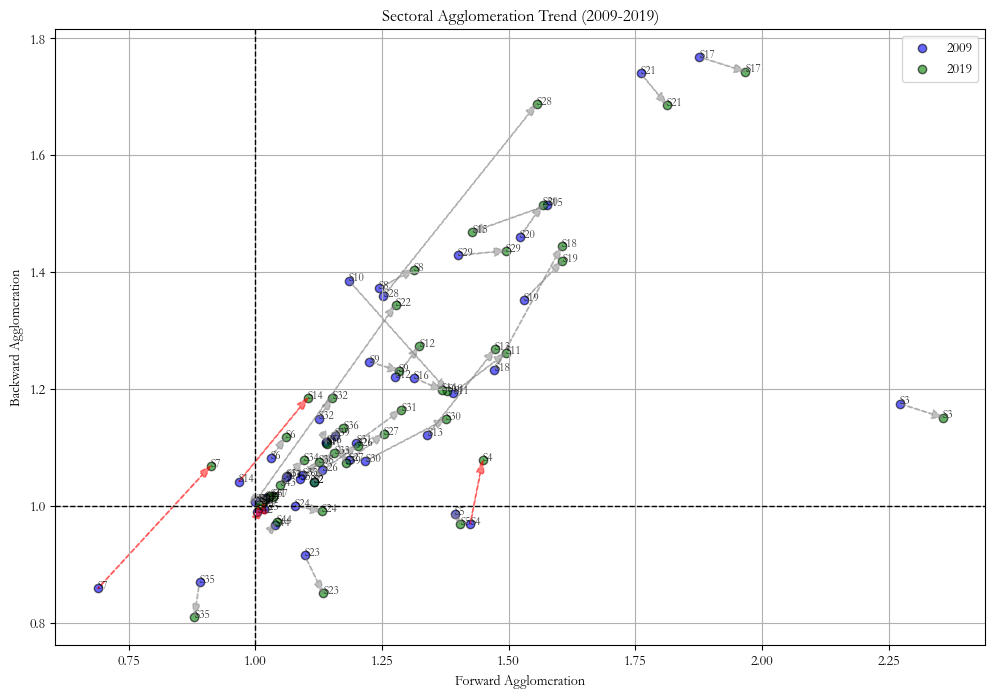

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import os

plt.rcParams['font.family'] = 'Garamond'
plt.rcParams['font.style'] = 'normal'

# 定义文件路径和年份列表
directory = r"E:\China_vs_India\PAK\Agglomeration_Results"
years_group1 = ['1996', '2006']
years_group2 = ['2009', '2019']

# 创建一个函数来处理每个文件并返回结果
def process_file(file_path):
    fl_df = pd.read_excel(file_path, sheet_name='FL', index_col=0)
    bl_df = pd.read_excel(file_path, sheet_name='BL', index_col=0)
    
    desired_countries = ['PAK']
    
    results = []
    
    for sector in fl_df.index:
        for country in desired_countries:
            fl_value = fl_df.at[sector, country]
            bl_value = bl_df.at[sector, country]
            if fl_value < 1 and bl_value > 1:
                classification = 'reshoring economies'
            elif fl_value > 1 and bl_value > 1:
                classification = 'high agglomeration'
            elif fl_value < 1 and bl_value < 1:
                classification = 'low agglomeration'
            elif fl_value > 1 and bl_value < 1:
                classification = 'DVA generating economies'
            
            results.append([sector, classification, fl_value, bl_value])
    
    return results

# 定义一个函数来绘制散点图并添加箭头
def plot_scatter(results_group1, results_group2, filename, colors_group1, colors_group2, year_range):
    plt.figure(figsize=(12, 8))
    
    sector_positions = {}

    # 绘制1996和2006年数据点
    for result in results_group1:
        sector, classification, fl_value, bl_value = result
        sector_positions[sector] = {'group1': (fl_value, bl_value)}
        plt.scatter(fl_value, bl_value, color=colors_group1, label='1996' if '1996' not in plt.gca().get_legend_handles_labels()[1] else "", alpha=0.6, edgecolor='k')
        plt.text(fl_value, bl_value, sector, fontsize=8, alpha=0.8)
    
    # 绘制2009和2019年数据点
    for result in results_group2:
        sector, classification, fl_value, bl_value = result
        if sector in sector_positions:
            sector_positions[sector]['group2'] = (fl_value, bl_value)
        else:
            sector_positions[sector] = {'group2': (fl_value, bl_value)}
        plt.scatter(fl_value, bl_value, color=colors_group2, label='2006' if '2006' not in plt.gca().get_legend_handles_labels()[1] else "", alpha=0.6, edgecolor='k')
        plt.text(fl_value, bl_value, sector, fontsize=8, alpha=0.8)
    
    # 添加分隔线
    plt.axvline(x=1, color='black', linestyle='--', linewidth=1)
    plt.axhline(y=1, color='black', linestyle='--', linewidth=1)
    
    # 添加箭头
    for sector, positions in sector_positions.items():
        if 'group1' in positions and 'group2' in positions:
            start_pos = positions['group1']
            end_pos = positions['group2']
            start_quadrant = (start_pos[0] > 1, start_pos[1] > 1)
            end_quadrant = (end_pos[0] > 1, end_pos[1] > 1)
            arrow_color = 'gray'
            if start_quadrant != end_quadrant:
                arrow_color = 'red'
            plt.arrow(start_pos[0], start_pos[1], end_pos[0] - start_pos[0], end_pos[1] - start_pos[1], color=arrow_color, alpha=0.5, head_width=0.015, length_includes_head=True, linestyle='dashed')

    # 添加图例和标签
    plt.xlabel('Forward Agglomeration')
    plt.ylabel('Backward Agglomeration')
    plt.title(f'Sectoral Agglomeration Trend ({year_range})')
    plt.legend()
    
    # 添加网格线
    plt.grid(True)
    
    # 保存和显示图表
    scatter_output_path = os.path.join(directory, filename)
    plt.savefig(scatter_output_path, dpi=1200, bbox_inches='tight')
    
    print(f"Scatter plot saved to file: {scatter_output_path}")
    plt.show()

# 处理每个年份的文件并绘制图表
results_1996 = process_file(os.path.join(directory, '1996.xlsx'))
results_2006 = process_file(os.path.join(directory, '2006.xlsx'))
results_2009 = process_file(os.path.join(directory, '2009.xlsx'))
results_2019 = process_file(os.path.join(directory, '2019.xlsx'))

# 绘制1996年和2006年的数据
plot_scatter(results_1996, results_2006, "Agglomeration_Scatter_1996_2006.svg", 'blue', 'green', '1996-2006')

# # 绘制2009年和2019年的数据
# plot_scatter(results_2009, results_2019, "Agglomeration_Scatter_2009_2019.svg", 'blue', 'green', '2009-2019')

import pandas as pd
import matplotlib.pyplot as plt
import os

plt.rcParams['font.family'] = 'Garamond'
plt.rcParams['font.style'] = 'normal'

# 定义文件路径和年份列表
directory = r"E:\China_vs_India\PAK\Agglomeration_Results"
years_group1 = ['1996', '2006']
years_group2 = ['2009', '2019']

# 创建一个函数来处理每个文件并返回结果
def process_file(file_path):
    fl_df = pd.read_excel(file_path, sheet_name='FL', index_col=0)
    bl_df = pd.read_excel(file_path, sheet_name='BL', index_col=0)
    
    desired_countries = ['PAK']
    
    results = []
    
    for sector in fl_df.index:
        for country in desired_countries:
            fl_value = fl_df.at[sector, country]
            bl_value = bl_df.at[sector, country]
            if fl_value < 1 and bl_value > 1:
                classification = 'reshoring economies'
            elif fl_value > 1 and bl_value > 1:
                classification = 'high agglomeration'
            elif fl_value < 1 and bl_value < 1:
                classification = 'low agglomeration'
            elif fl_value > 1 and bl_value < 1:
                classification = 'DVA generating economies'
            
            results.append([sector, classification, fl_value, bl_value])
    
    return results

# 定义一个函数来绘制散点图并添加箭头
def plot_scatter(results_group1, results_group2, filename, colors_group1, colors_group2, year_range):
    plt.figure(figsize=(12, 8))
    
    sector_positions = {}

    # 绘制1996和2006年数据点
    for result in results_group1:
        sector, classification, fl_value, bl_value = result
        sector_positions[sector] = {'group1': (fl_value, bl_value)}
        plt.scatter(fl_value, bl_value, color=colors_group1, label='2009' if '2009' not in plt.gca().get_legend_handles_labels()[1] else "", alpha=0.6, edgecolor='k')
        plt.text(fl_value, bl_value, sector, fontsize=8, alpha=0.8)
    
    # 绘制2009和2019年数据点
    for result in results_group2:
        sector, classification, fl_value, bl_value = result
        if sector in sector_positions:
            sector_positions[sector]['group2'] = (fl_value, bl_value)
        else:
            sector_positions[sector] = {'group2': (fl_value, bl_value)}
        plt.scatter(fl_value, bl_value, color=colors_group2, label='2019' if '2019' not in plt.gca().get_legend_handles_labels()[1] else "", alpha=0.6, edgecolor='k')
        plt.text(fl_value, bl_value, sector, fontsize=8, alpha=0.8)
    
    # 添加分隔线
    plt.axvline(x=1, color='black', linestyle='--', linewidth=1)
    plt.axhline(y=1, color='black', linestyle='--', linewidth=1)
    
    # 添加箭头
    for sector, positions in sector_positions.items():
        if 'group1' in positions and 'group2' in positions:
            start_pos = positions['group1']
            end_pos = positions['group2']
            start_quadrant = (start_pos[0] > 1, start_pos[1] > 1)
            end_quadrant = (end_pos[0] > 1, end_pos[1] > 1)
            arrow_color = 'gray'
            if start_quadrant != end_quadrant:
                arrow_color = 'red'
            plt.arrow(start_pos[0], start_pos[1], end_pos[0] - start_pos[0], end_pos[1] - start_pos[1], color=arrow_color, alpha=0.5, head_width=0.015, length_includes_head=True, linestyle='dashed')

    # 添加图例和标签
    plt.xlabel('Forward Agglomeration')
    plt.ylabel('Backward Agglomeration')
    plt.title(f'Sectoral Agglomeration Trend ({year_range})')
    plt.legend()
    
    # 添加网格线
    plt.grid(True)
    
    # 保存和显示图表
    scatter_output_path = os.path.join(directory, filename)
    plt.savefig(scatter_output_path, dpi=1200, bbox_inches='tight')
    
    print(f"Scatter plot saved to file: {scatter_output_path}")
    plt.show()

# 处理每个年份的文件并绘制图表
results_1996 = process_file(os.path.join(directory, '1996.xlsx'))
results_2006 = process_file(os.path.join(directory, '2006.xlsx'))
results_2009 = process_file(os.path.join(directory, '2009.xlsx'))
results_2019 = process_file(os.path.join(directory, '2019.xlsx'))

# 绘制1996年和2006年的数据
# plot_scatter(results_1996, results_2006, "Agglomeration_Scatter_1996_2006.svg", 'blue', 'green', '1996-2006')

# # 绘制2009年和2019年的数据
plot_scatter(results_2009, results_2019, "Agglomeration_Scatter_2009_2019.svg", 'blue', 'green', '2009-2019')


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

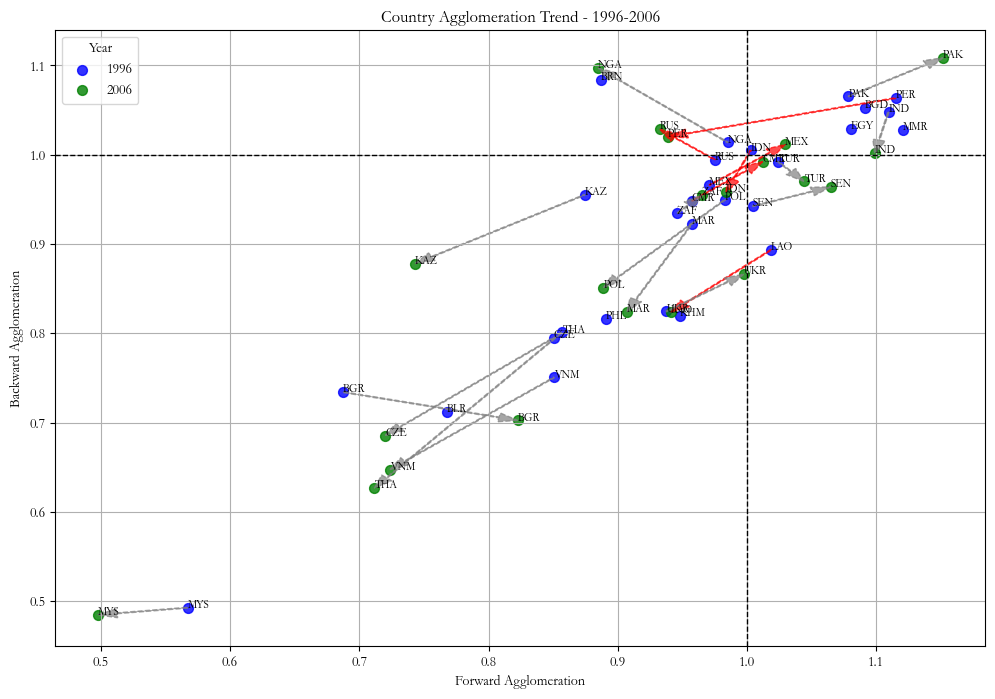

Scatter plot saved to: E:\China_vs_India\PAK\Agglomeration_Results\Agglomeration_Scatter_Plot_1996-2006.svg


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

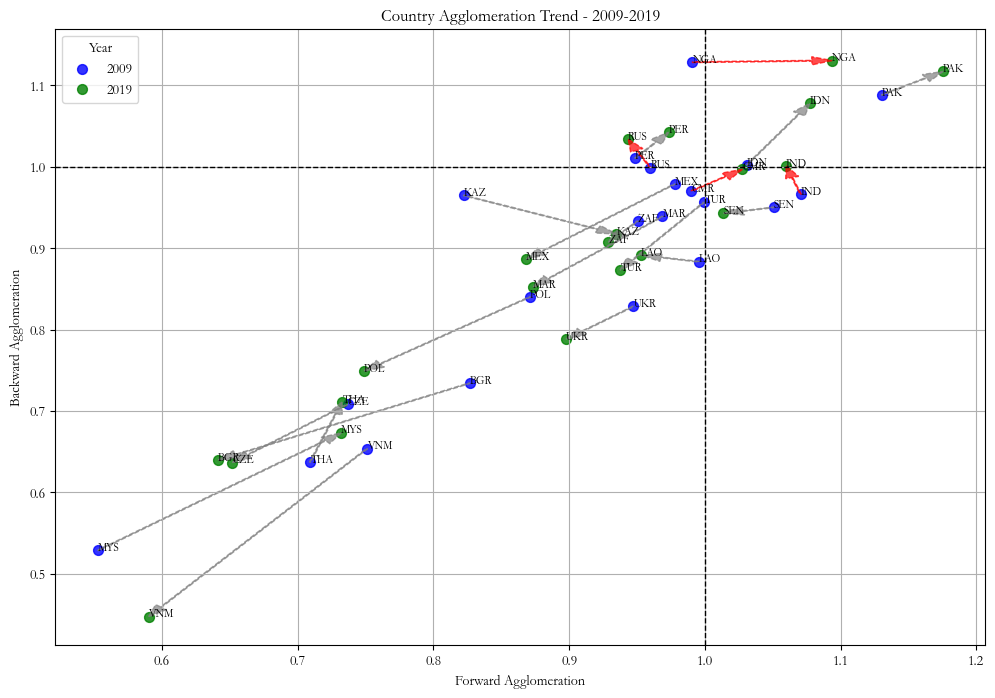

Scatter plot saved to: E:\China_vs_India\PAK\Agglomeration_Results\Agglomeration_Scatter_Plot_2009-2019.svg
All scatter plots saved.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import os

plt.rcParams['font.family'] = 'Garamond'
plt.rcParams['font.style'] = 'normal'

# Define folder path and years list
directory = r"E:\China_vs_India\PAK\Agglomeration_Results"
years = {
    '1996-2006': ['1996', '2006'],
    '2009-2019': ['2009', '2019'],
}

# Define income group classifications based on World Bank data
high_income_countries = ['ARG', 'AUS', 'AUT', 'BEL', 'BRA', 'CAN', 'CHE', 'CHL', 'CHN', 'COL', 'CRI', 'CYP', 'DEU', 
                         'DNK', 'ESP', 'EST', 'FIN', 'FRA', 'GBR', 'GRC', 'HKG', 'HRV', 'HUN', 'IRL', 'ISL', 'ISR', 
                         'ITA', 'JPN', 'KOR', 'LTU', 'LUX', 'LVA', 'MLT', 'NLD', 'NOR', 'NZL', 'PRT', 'QAT', 'ROU', 
                         'SAU', 'SGP', 'SVK', 'SVN', 'SWE', 'TWN', 'ARE', 'USA','ROW', 'CIV', 'TUN','JOR']

upper_middle_income_countries = ['BGR', 'BLR', 'BRN', 'CHN', 'CRI', 'HRV', 'HUN', 'IDN',  'KAZ', 'LBY', 'MYS', 
                                 'MEX', 'PAN', 'PER', 'PHL', 'POL', 'ROU', 'RUS', 'THA', 'TUR', 'UKR']

lower_middle_income_countries = ['BGD', 'CMR', 'EGY', 'GTM', 'HTI', 'HND', 'IND', 'KEN', 'LAO', 'MAR', 'MMR', 
                                 'NGA', 'PAK', 'SEN', 'SLV', 'VNM', 'ZAF']

# Classification function based on income groups
def classify(country_code):
    if country_code in upper_middle_income_countries:
        return 'upper middle income'
    elif country_code in lower_middle_income_countries:
        return 'lower middle income'
    else:
        return 'unknown'

# Function to process each file and plot scatter plot
def process_files(file_paths, year_group):
    plt.figure(figsize=(12, 8))
    
    # Define colors for different years
    colors = ['blue', 'green']

    country_positions = {}

    for idx, (file_path, year) in enumerate(file_paths.items()):
        # Read data
        df = pd.read_excel(file_path, sheet_name='Country Level', index_col=0)
        
        # Extract country codes
        countries = df.columns.tolist()
        
        # Filter out high income countries
        countries = [country for country in countries if country not in high_income_countries]
        
        # Store results in a list
        results = []
        
        # Classify each country and store results
        for country in countries:
            fl_value = df.at['FL', country]
            bl_value = df.at['BL', country]
            classification = classify(country)
            results.append([country, classification, fl_value, bl_value])
        
        # Create DataFrame from results
        results_df = pd.DataFrame(results, columns=['Country', 'Classification', 'FL', 'BL'])
        
        for index, row in results_df.iterrows():
            country = row['Country']
            classification = row['Classification']
            fl_value = row['FL']
            bl_value = row['BL']
            
            if country not in country_positions:
                country_positions[country] = {}
            country_positions[country][year] = (fl_value, bl_value)

            plt.scatter(fl_value, bl_value, color=colors[idx], label=year if year not in plt.gca().get_legend_handles_labels()[1] else "", s=50, alpha=0.8)
            plt.text(fl_value, bl_value, country, fontsize=8)
    
    # Draw dashed lines
    plt.axvline(x=1, color='black', linestyle='--', linewidth=1)
    plt.axhline(y=1, color='black', linestyle='--', linewidth=1)
    
    # Draw arrows
    for country, positions in country_positions.items():
        if len(positions) == 2:
            years = list(positions.keys())
            start_pos = positions[years[0]]
            end_pos = positions[years[1]]

            start_quadrant = (start_pos[0] > 1, start_pos[1] > 1)
            end_quadrant = (end_pos[0] > 1, end_pos[1] > 1)
            arrow_color = 'gray'
            if start_quadrant != end_quadrant:
                arrow_color = 'red'

            plt.arrow(start_pos[0], start_pos[1], end_pos[0] - start_pos[0], end_pos[1] - start_pos[1],
                      color=arrow_color, alpha=0.7, head_width=0.01, length_includes_head=True, linestyle='dashed')

    plt.xlabel('Forward Agglomeration')
    plt.ylabel('Backward Agglomeration')
    plt.title(f'Country Agglomeration Trend - {year_group}')
    plt.grid(True)
    
    # Add legend
    plt.legend(title='Year')
    
    # Save the plot
    scatter_output_path = os.path.join(directory, f"Agglomeration_Scatter_Plot_{year_group}.svg")
    plt.savefig(scatter_output_path)  # Save high-resolution image
    plt.show()
    
    print(f"Scatter plot saved to: {scatter_output_path}")

# Process each group of years' files and plot scatter plot
for year_group, file_years in years.items():
    file_paths = {}
    for year in file_years:
        file_path = os.path.join(directory, f"{year}.xlsx")
        file_paths[file_path] = year
    process_files(file_paths, year_group)

print("All scatter plots saved.")


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

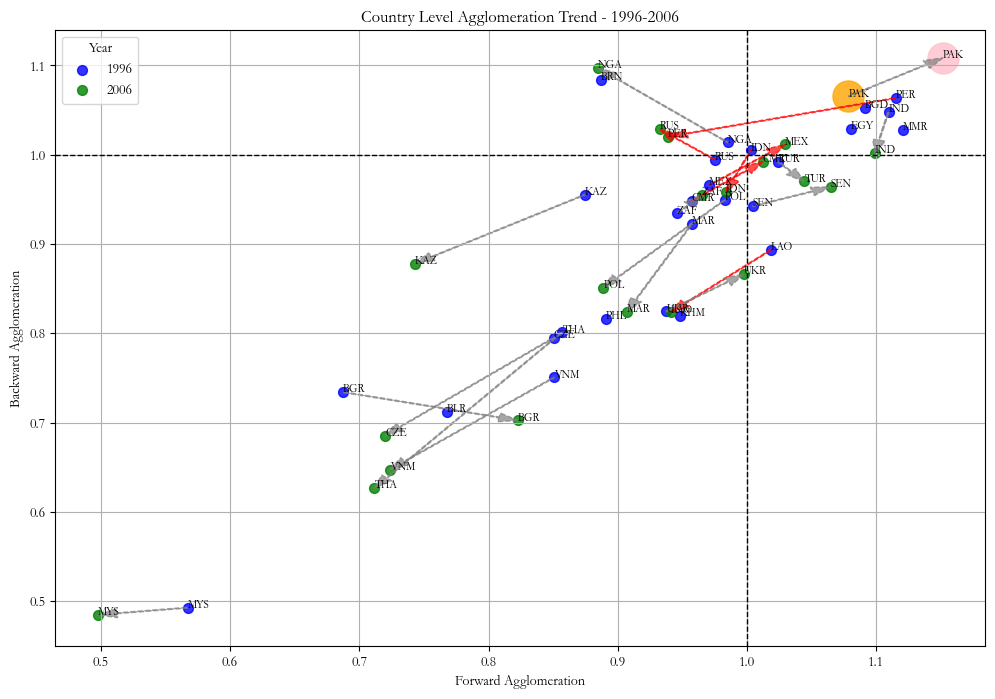

Scatter plot saved to: E:\China_vs_India\PAK\Agglomeration_Results\Agglomeration_Scatter_Plot_1996-2006.svg


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

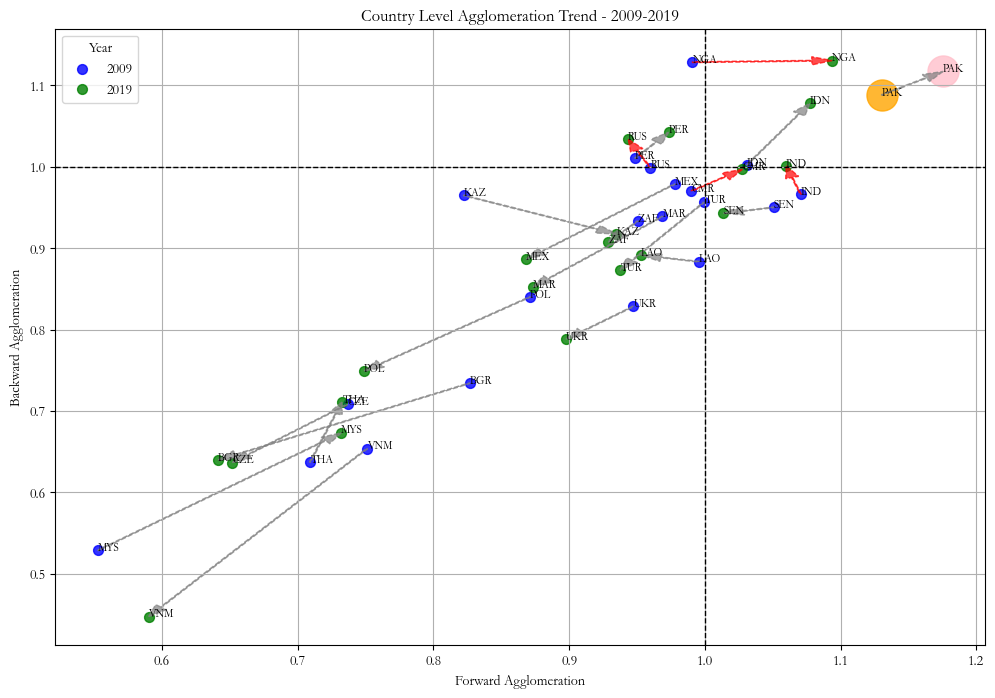

Scatter plot saved to: E:\China_vs_India\PAK\Agglomeration_Results\Agglomeration_Scatter_Plot_2009-2019.svg
All scatter plots saved.


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import os

plt.rcParams['font.family'] = 'Garamond'
plt.rcParams['font.style'] = 'normal'

# Define folder path and years list
directory = r"E:\China_vs_India\PAK\Agglomeration_Results"
years = {
    '1996-2006': ['1996', '2006'],
    '2009-2019': ['2009', '2019'],
}

# Define income group classifications based on World Bank data
high_income_countries = ['ARG', 'AUS', 'AUT', 'BEL', 'BRA', 'CAN', 'CHE', 'CHL', 'CHN', 'COL', 'CRI', 'CYP', 'DEU', 
                         'DNK', 'ESP', 'EST', 'FIN', 'FRA', 'GBR', 'GRC', 'HKG', 'HRV', 'HUN', 'IRL', 'ISL', 'ISR', 
                         'ITA', 'JPN', 'KOR', 'LTU', 'LUX', 'LVA', 'MLT', 'NLD', 'NOR', 'NZL', 'PRT', 'QAT', 'ROU', 
                         'SAU', 'SGP', 'SVK', 'SVN', 'SWE', 'TWN', 'ARE', 'USA','ROW', 'CIV', 'TUN','JOR']

upper_middle_income_countries = ['BGR', 'BLR', 'BRN', 'CHN', 'CRI', 'HRV', 'HUN', 'IDN',  'KAZ', 'LBY', 'MYS', 
                                 'MEX', 'PAN', 'PER', 'PHL', 'POL', 'ROU', 'RUS', 'THA', 'TUR', 'UKR']

lower_middle_income_countries = ['BGD', 'CMR', 'EGY', 'GTM', 'HTI', 'HND', 'IND', 'KEN', 'LAO', 'MAR', 'MMR', 
                                 'NGA', 'PAK', 'SEN', 'SLV', 'VNM', 'ZAF']

# Classification function based on income groups
def classify(country_code):
    if country_code in upper_middle_income_countries:
        return 'upper middle income'
    elif country_code in lower_middle_income_countries:
        return 'lower middle income'
    else:
        return 'unknown'

# Function to process each file and plot scatter plot
def process_files(file_paths, year_group):
    plt.figure(figsize=(12, 8))
    
    # Define colors for different years and for PAK
    colors = ['blue', 'green']
    pak_colors = ['orange', 'pink']

    country_positions = {}

    for idx, (file_path, year) in enumerate(file_paths.items()):
        # Read data
        df = pd.read_excel(file_path, sheet_name='Country Level', index_col=0)
        
        # Extract country codes
        countries = df.columns.tolist()
        
        # Filter out high income countries
        countries = [country for country in countries if country not in high_income_countries]
        
        # Store results in a list
        results = []
        
        # Classify each country and store results
        for country in countries:
            fl_value = df.at['FL', country]
            bl_value = df.at['BL', country]
            classification = classify(country)
            results.append([country, classification, fl_value, bl_value])
        
        # Create DataFrame from results
        results_df = pd.DataFrame(results, columns=['Country', 'Classification', 'FL', 'BL'])
        
        for index, row in results_df.iterrows():
            country = row['Country']
            classification = row['Classification']
            fl_value = row['FL']
            bl_value = row['BL']
            
            if country not in country_positions:
                country_positions[country] = {}
            country_positions[country][year] = (fl_value, bl_value)

            marker_size = 500 if country == 'PAK' else 50  # Make PAK marker larger
            marker_color = pak_colors[idx] if country == 'PAK' else colors[idx]  # Make PAK marker color different

            plt.scatter(fl_value, bl_value, color=marker_color, label=year if year not in plt.gca().get_legend_handles_labels()[1] else "", s=marker_size, alpha=0.8)
            plt.text(fl_value, bl_value, country, fontsize=8)
    
    # Draw dashed lines
    plt.axvline(x=1, color='black', linestyle='--', linewidth=1)
    plt.axhline(y=1, color='black', linestyle='--', linewidth=1)
    
    # Draw arrows
    for country, positions in country_positions.items():
        if len(positions) == 2:
            years = list(positions.keys())
            start_pos = positions[years[0]]
            end_pos = positions[years[1]]

            start_quadrant = (start_pos[0] > 1, start_pos[1] > 1)
            end_quadrant = (end_pos[0] > 1, end_pos[1] > 1)
            arrow_color = 'gray'
            if start_quadrant != end_quadrant:
                arrow_color = 'red'

            plt.arrow(start_pos[0], start_pos[1], end_pos[0] - start_pos[0], end_pos[1] - start_pos[1],
                      color=arrow_color, alpha=0.7, head_width=0.01, length_includes_head=True, linestyle='dashed')

    plt.xlabel('Forward Agglomeration')
    plt.ylabel('Backward Agglomeration')
    plt.title(f'Country Level Agglomeration Trend - {year_group}')
    plt.grid(True)
    
    # Add legend
    plt.legend(title='Year')
    
    # Save the plot
    scatter_output_path = os.path.join(directory, f"Agglomeration_Scatter_Plot_{year_group}.svg")
    plt.savefig(scatter_output_path)  # Save high-resolution image
    plt.show()
    
    print(f"Scatter plot saved to: {scatter_output_path}")

# Process each group of years' files and plot scatter plot
for year_group, file_years in years.items():
    file_paths = {}
    for year in file_years:
        file_path = os.path.join(directory, f"{year}.xlsx")
        file_paths[file_path] = year
    process_files(file_paths, year_group)

print("All scatter plots saved.")


             1996BL    1996FL    2006BL    2006FL    2009BL    2009FL  \
Prim       1.093596  1.115983  1.110103  1.162557  1.073859  1.127812   
Ext        1.145049  1.683591  1.129047  1.929073  1.042963  1.696306   
L-Manu     1.171751  1.072290  1.211883  1.134295  1.193384  1.114267   
M-Manu     1.146236  1.327273  1.262774  1.436546  1.225074  1.294361   
H-Manu     1.242404  1.385608  1.430173  1.550239  1.370855  1.478340   
Util       1.022208  1.061499  0.978212  1.103408  0.957265  1.087346   
Cons       0.987894  1.008301  1.013727  1.017406  0.994295  1.016189   
Trad       1.040120  1.071054  1.059613  1.134155  1.060513  1.132251   
Trans      1.246909  1.203769  1.232130  1.249785  1.209474  1.250737   
ICT        0.948659  0.963541  1.033476  1.067795  0.990617  1.015024   
Fin-RE     1.022665  1.042740  1.059805  1.079613  1.059579  1.079494   
Serv-Sup   1.052058  1.069511  1.082132  1.102275  1.078609  1.106829   
Pub-Serv   0.997243  1.006796  1.005528  1.011353  

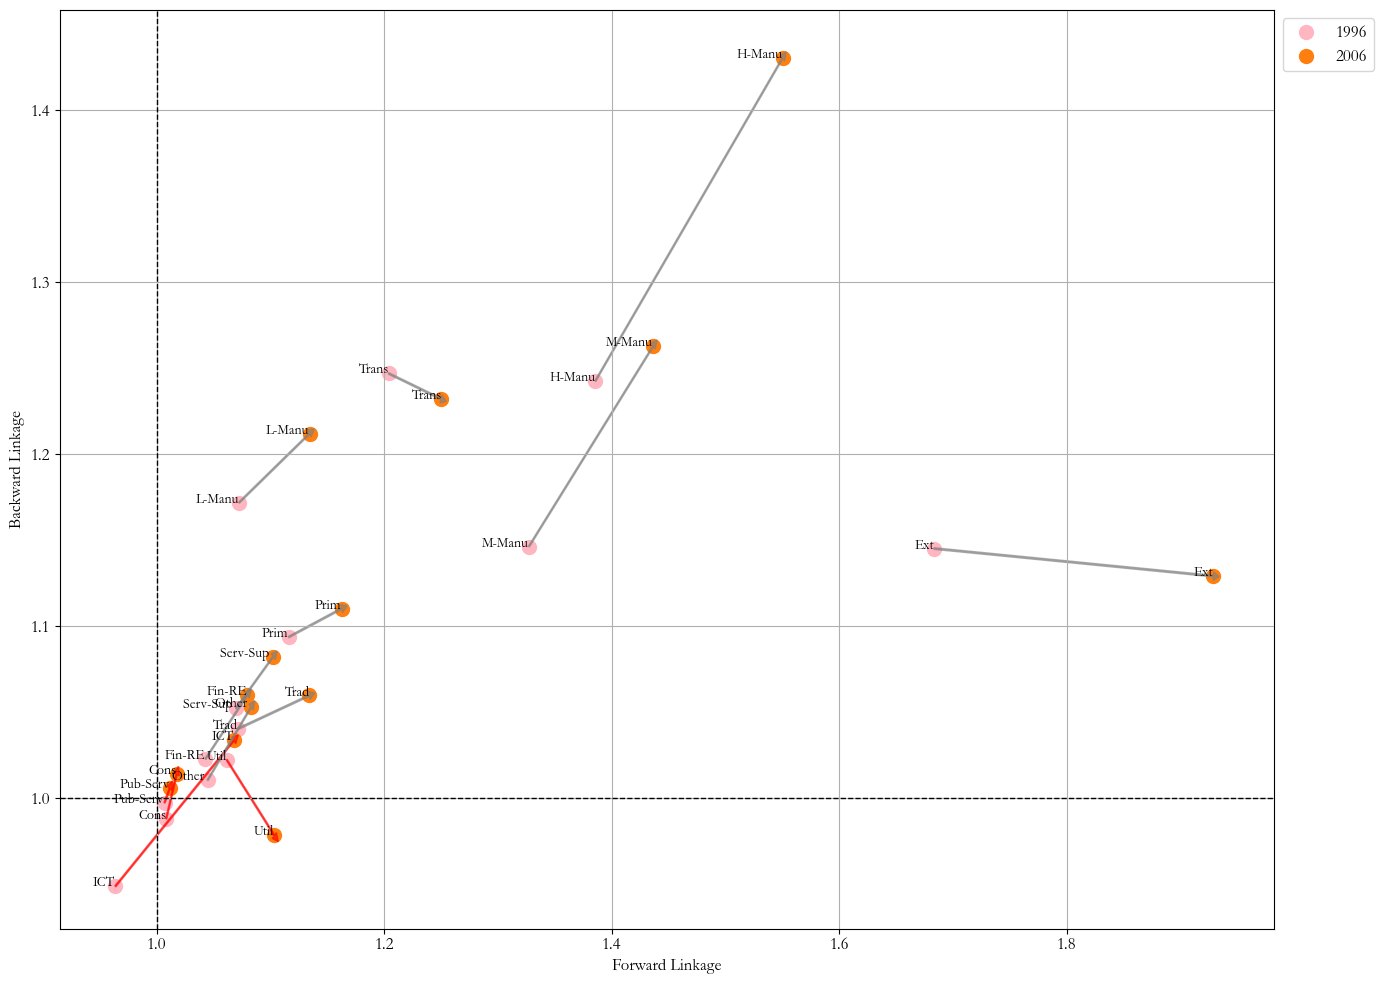

散点图已保存到文件: E:\China_vs_India\PAK\Results of PAK\Results of agglomeration\merge_Agglomeration_Scatter_2009_2019.svg


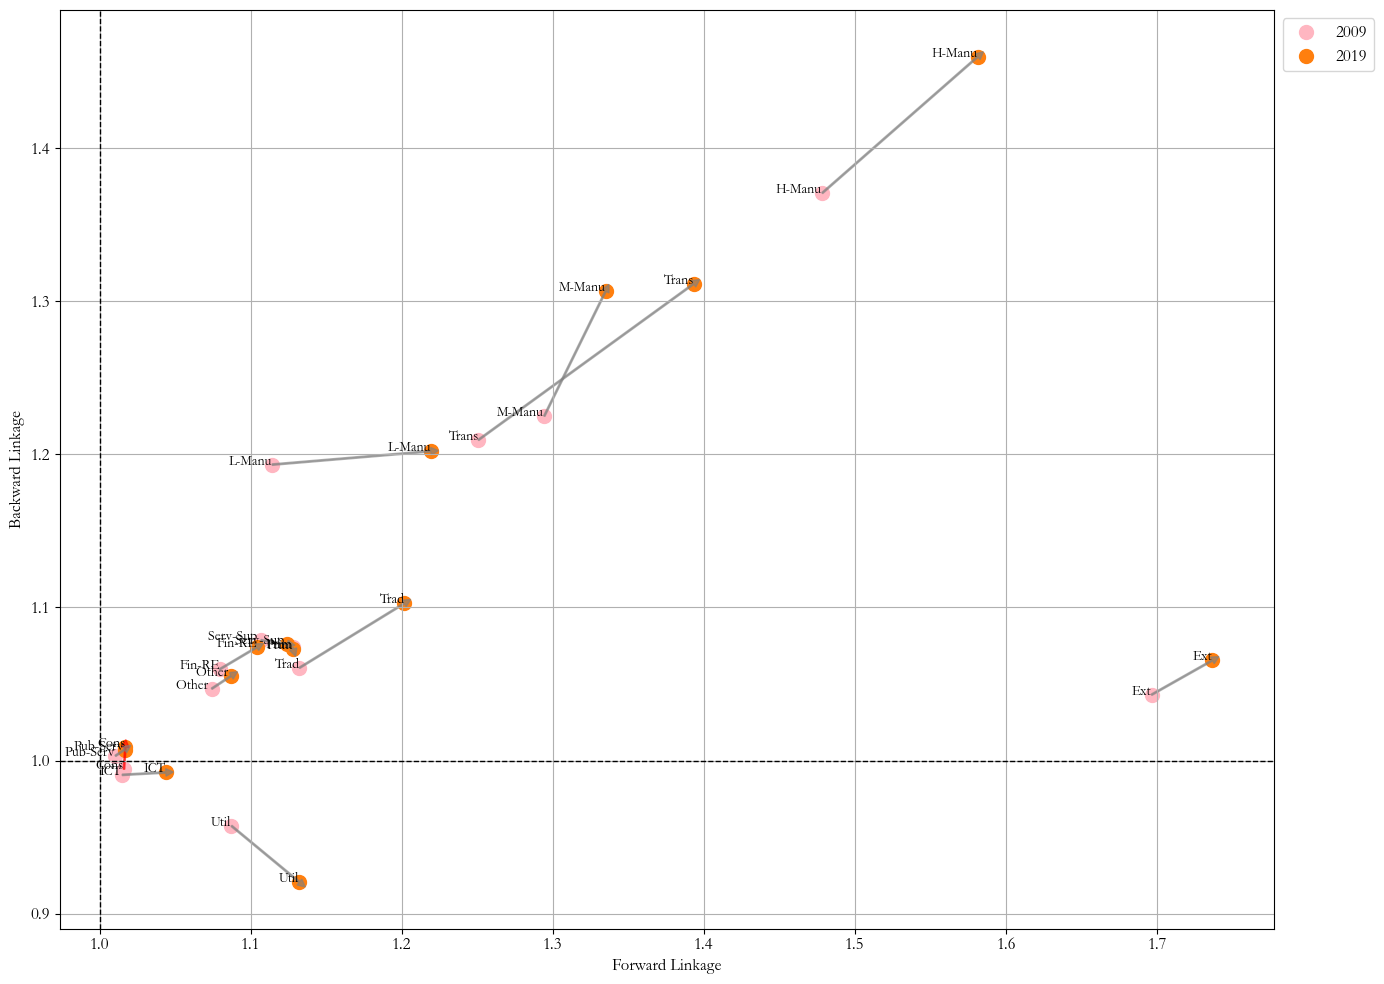

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# 设置绘图字体和样式
plt.rcParams['font.family'] = 'Garamond'
plt.rcParams['font.size'] = 12
plt.rcParams['font.style'] = 'normal'
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 12

# 定义文件路径
directory = r"E:\China_vs_India\PAK\Results of PAK\Results of agglomeration"
file_path = os.path.join(directory, 'CAT.xlsx')

# 读取数据
df = pd.read_excel(file_path, sheet_name='ALL CAT', index_col=0)

# 显示数据
print(df)

# 创建一个函数来绘制图表并添加箭头
def plot_agglomeration(df, years, filename):
    plt.figure(figsize=(14, 10))
    
    colors = ['#FFB6C1', '#ff7f0e', '#2ca02c', '#d62728']  # 使用用户偏好的颜色
    markers = ['o', 'o', 'D', '^']  # 标记列表

    for i, year in enumerate(years):
        bl_column = f"{year}BL"
        fl_column = f"{year}FL"
        plt.scatter(df[fl_column], df[bl_column], color=colors[i], marker=markers[i], label=f"{year}", s=100)
        
        # 添加标注
        for sector in df.index:
            plt.text(df.at[sector, fl_column], df.at[sector, bl_column], sector, fontsize=10, ha='right')
    
    # 添加箭头来表示移动轨迹
    for i in range(len(years) - 1):
        bl_column_start = f"{years[i]}BL"
        fl_column_start = f"{years[i]}FL"
        bl_column_end = f"{years[i+1]}BL"
        fl_column_end = f"{years[i+1]}FL"
        
        for sector in df.index:
            start_x = df.at[sector, fl_column_start]
            start_y = df.at[sector, bl_column_start]
            end_x = df.at[sector, fl_column_end]
            end_y = df.at[sector, bl_column_end]
            
            # 判断是否跨象限
            if (start_x < 1 and end_x >= 1) or (start_x >= 1 and end_x < 1) or \
               (start_y < 1 and end_y >= 1) or (start_y >= 1 and end_y < 1):
                arrow_color = 'red'
            else:
                arrow_color = 'grey'
            
            plt.arrow(start_x, start_y, end_x - start_x, end_y - start_y,
                      color=arrow_color, alpha=0.6, width=0.001, head_width=0.005, head_length=0.005)

    plt.axvline(x=1, color='black', linestyle='--', linewidth=1)
    plt.axhline(y=1, color='black', linestyle='--', linewidth=1)
    
    plt.xlabel('Forward Linkage')
    plt.ylabel('Backward Linkage')
    # plt.title('Agglomeration Scatter Plot Comparison with Trajectories')
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.grid(True)
    
    scatter_output_path = os.path.join(directory, filename)
    plt.tight_layout()
    plt.savefig(scatter_output_path, dpi=1200)
    
    print(f"散点图已保存到文件: {scatter_output_path}")
    plt.show()

# 定义年份
years_group1 = ['1996', '2006']
years_group2 = ['2009', '2019']

# 绘制1996年和2006年的数据
plot_agglomeration(df, years_group1, "merge_Agglomeration_Scatter_1996_2006.svg")

# 绘制2009年和2019年的数据
plot_agglomeration(df, years_group2, "merge_Agglomeration_Scatter_2009_2019.svg")
